In [1]:
import pandas as pd 
df= pd.read_json(r"C:\Users\ronit\Downloads\sample_airbnb.json")


In [2]:
# Created a list to store the required data for analysis
data = []

for i in range(len(df)):
    data1 = {
        'ID': df['_id'][i],  
        'Property_Name': df['name'][i],  
        'Property_type': df['property_type'][i],
        'Room_type': df['room_type'][i],
        'Bed_type': df['bed_type'][i],
        'Minimum_nights': df["minimum_nights"][i],
        'Maximum_night': df["maximum_nights"][i],
        'Accommodates': df["accommodates"][i],
        'Cancellation_policy':df["cancellation_policy"][i],
        'Accommodates': df["accommodates"][i],
        'No_of_bedrooms': df["bedrooms"][i],
        'No_of_beds': df["beds"][i],
        'Availability_365':df["availability"][i]['availability_365'],
        'Extra_people':df['extra_people'][i],
        'Reviews_count': df["number_of_reviews"][i],
        'No_of_Bathroom': df["bathrooms"][i],
        'Price': df["price"][i],
        'Security_deposit': df["security_deposit"][i],
        'Cleaning_fee': df["cleaning_fee"][i],
        'Host_id':df['host'][i]['host_id'],
        'Host_name':df['host'][i]['host_name'],
        'Street': df["address"][i]['street'],
        'Suburb': df["address"][i]['suburb'],
        'Market': df["address"][i]['market'],
        'Country': df["address"][i]['country'],
        'Host_Response_rate': df['host'][i].get("host_response_rate", None),
        'longitude': df["address"][i]['location']['coordinates'][0],
        'latitude': df["address"][i]['location']['coordinates'][1],
    }

    # Check if 'review_scores' exists and access its keys accordingly
    if 'review_scores' in df and i < len(df['review_scores']):
        data1['review_scores_accuracy'] = df['review_scores'][i].get('review_scores_accuracy', None)
        data1['review_scores_cleanliness'] = df['review_scores'][i].get('review_scores_cleanliness', None)
        data1['review_scores_checkin'] = df['review_scores'][i].get('review_scores_checkin', None)
        data1['review_scores_communication'] = df['review_scores'][i].get('review_scores_communication', None)
        data1['review_scores_location'] = df['review_scores'][i].get('review_scores_location', None)
        data1['review_scores_value'] = df['review_scores'][i].get('review_scores_value', None)
        data1['review_scores_rating'] = df['review_scores'][i].get('review_scores_rating', None)
    else:
        # If 'review_scores' doesn't exist or if the index is out of range, set all review scores to None
        data1['review_scores_accuracy'] = None
        data1['review_scores_cleanliness'] = None
        data1['review_scores_checkin'] = None
        data1['review_scores_communication'] = None
        data1['review_scores_location'] = None
        data1['review_scores_value'] = None
        data1['review_scores_rating'] = None

    data.append(data1)

In [3]:
import pandas as pd

# Convert data to DataFrame
df = pd.DataFrame(data)

In [4]:
# To find Missing value
df.isna().sum()

ID                                0
Property_Name                     0
Property_type                     0
Room_type                         0
Bed_type                          0
Minimum_nights                    0
Maximum_night                     0
Accommodates                      0
Cancellation_policy               0
No_of_bedrooms                    5
No_of_beds                       13
Availability_365                  0
Extra_people                      0
Reviews_count                     0
No_of_Bathroom                   10
Price                             0
Security_deposit               2084
Cleaning_fee                   1531
Host_id                           0
Host_name                         0
Street                            0
Suburb                            0
Market                            0
Country                           0
Host_Response_rate             1388
longitude                         0
latitude                          0
review_scores_accuracy      

# Drop missing Values


In [5]:
df.drop(['Security_deposit','Security_deposit','Cleaning_fee'],axis=1, inplace=True)
df.dropna(subset=['No_of_bedrooms','No_of_beds','No_of_Bathroom'], inplace=True)

# Forward Fill the missing Value

In [6]:
df.fillna(method='ffill',inplace=True)


C:\Users\ronit\AppData\Local\Temp\ipykernel_21060\3337295870.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [7]:
# To find Missing value
df.isna().sum()

ID                             0
Property_Name                  0
Property_type                  0
Room_type                      0
Bed_type                       0
Minimum_nights                 0
Maximum_night                  0
Accommodates                   0
Cancellation_policy            0
No_of_bedrooms                 0
No_of_beds                     0
Availability_365               0
Extra_people                   0
Reviews_count                  0
No_of_Bathroom                 0
Price                          0
Host_id                        0
Host_name                      0
Street                         0
Suburb                         0
Market                         0
Country                        0
Host_Response_rate             0
longitude                      0
latitude                       0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_sco

In [11]:
import pandas as pd

# Convert data to DataFrame
dff = pd.DataFrame(df)

# Save DataFrame to CSV
dff.to_csv('airbnb_data_2.csv', index=False,mode='w+')

# Exploratory Data Analysis

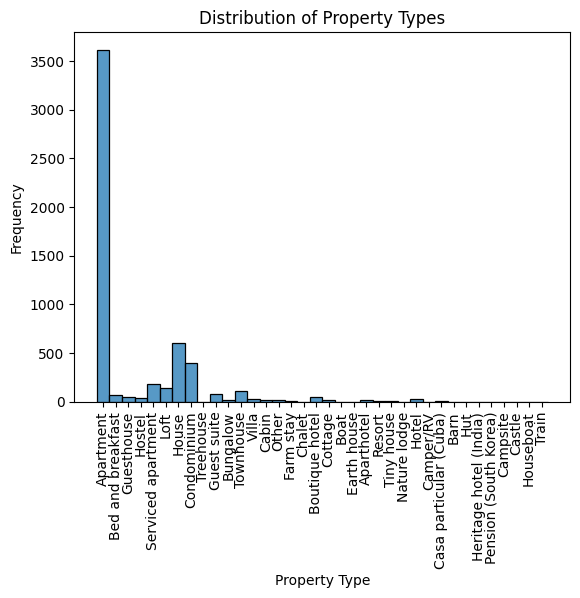

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of the 'Property_type' variable
sns.histplot(data=df, x='Property_type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Property Type')  # Add x-axis label
plt.ylabel('Frequency')  # Add y-axis label
plt.title('Distribution of Property Types')  # Add title
plt.show()


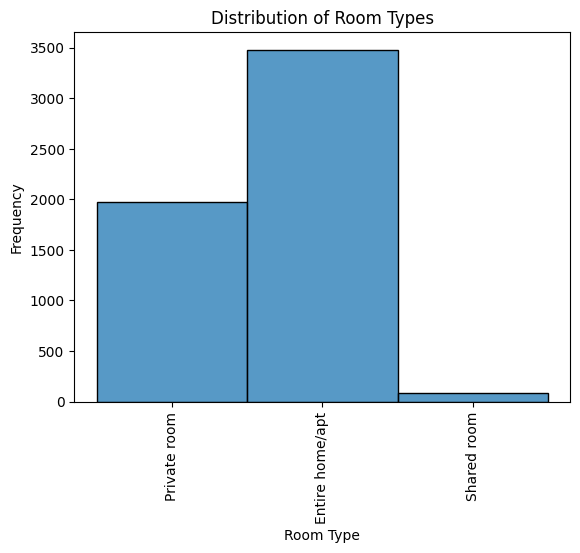

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of the 'Room_type' variable
sns.histplot(data=df, x='Room_type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Room Type')  # Add x-axis label
plt.ylabel('Frequency')  # Add y-axis label
plt.title('Distribution of Room Types')  # Add title
plt.show()


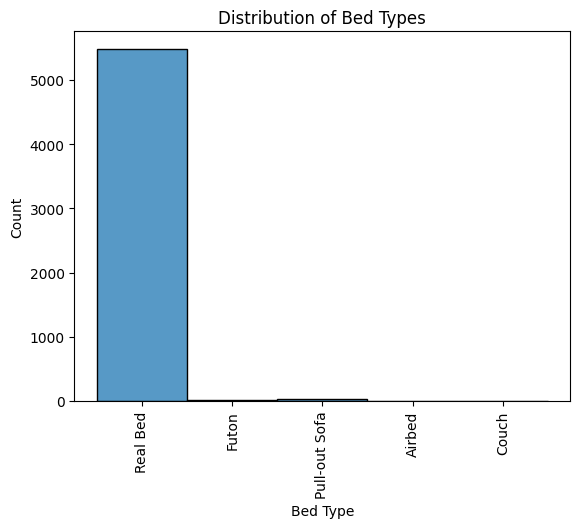

In [12]:
# Create a histogram of the 'Bed Type' variable
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df,x='Bed_type')
plt.xticks(rotation =90)
plt.xlabel('Bed Type')
plt.ylabel('Count')
plt.title('Distribution of Bed Types')
plt.show()

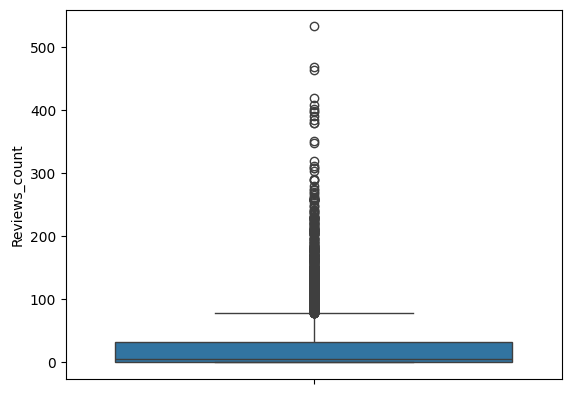

In [13]:
# To see the outlier in the Review 
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data= df, y='Reviews_count')
plt.show()

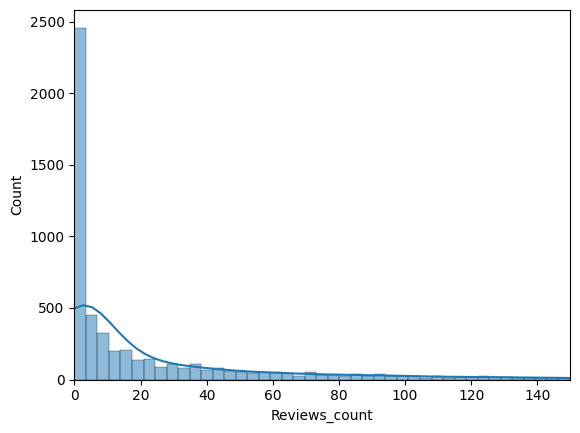

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data= df['Reviews_count'],kde=True)
plt.xlim(0,150)
plt.show()

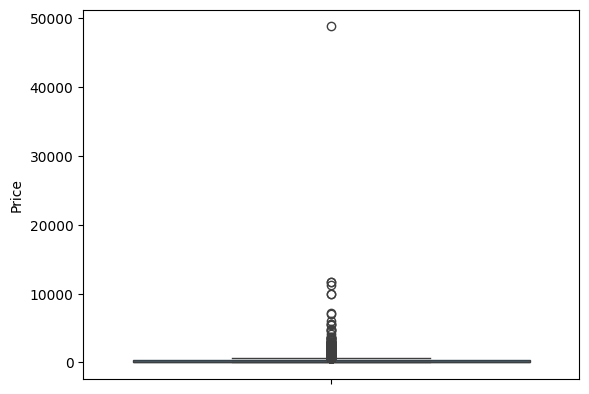

In [15]:
#To see the price distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df,y='Price')
plt.show()

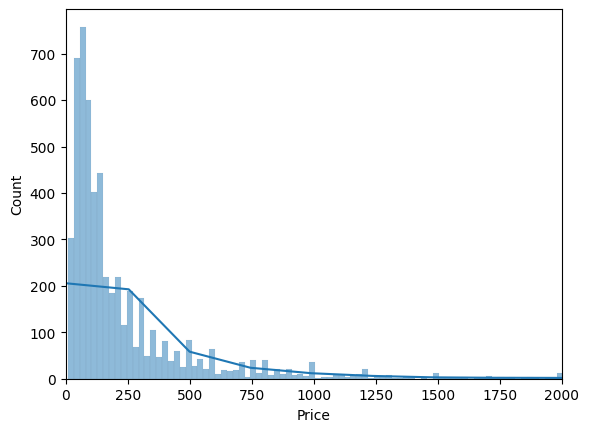

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df['Price'],kde=True)
plt.xlim(0,2000)
plt.show()

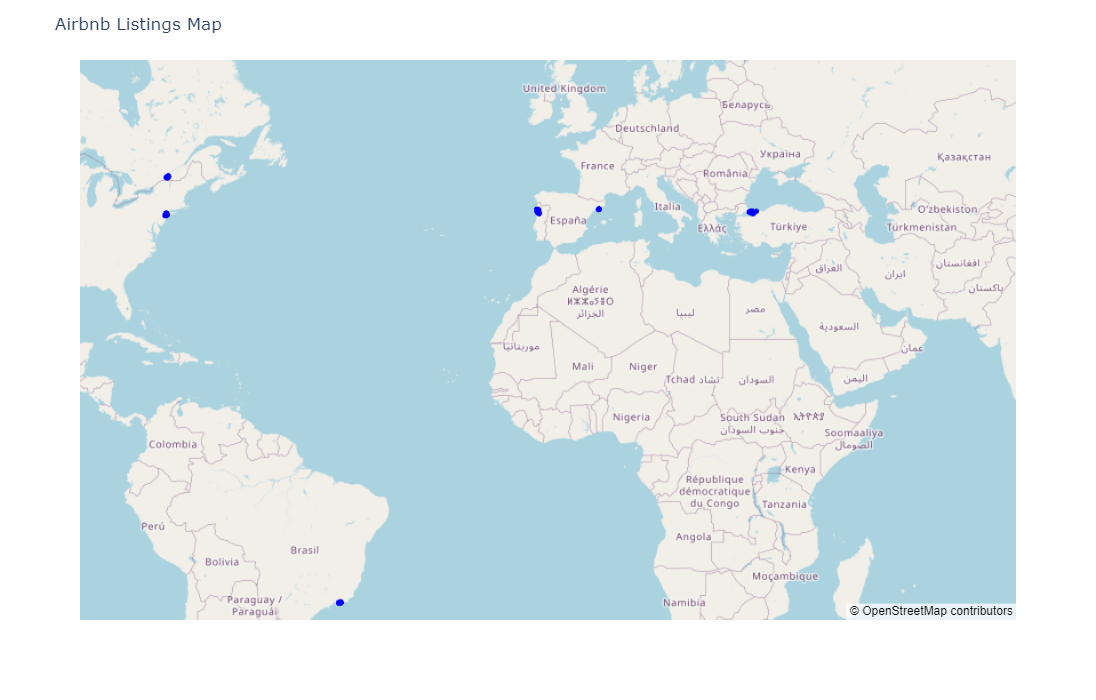

In [17]:
# Airbnb map for all listing property
import plotly.express as px

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="Property_Name", hover_data=["Price", "Country"],
                        color_discrete_sequence=["blue"], zoom=2, height=700)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Airbnb Listings Map")
fig.show() 


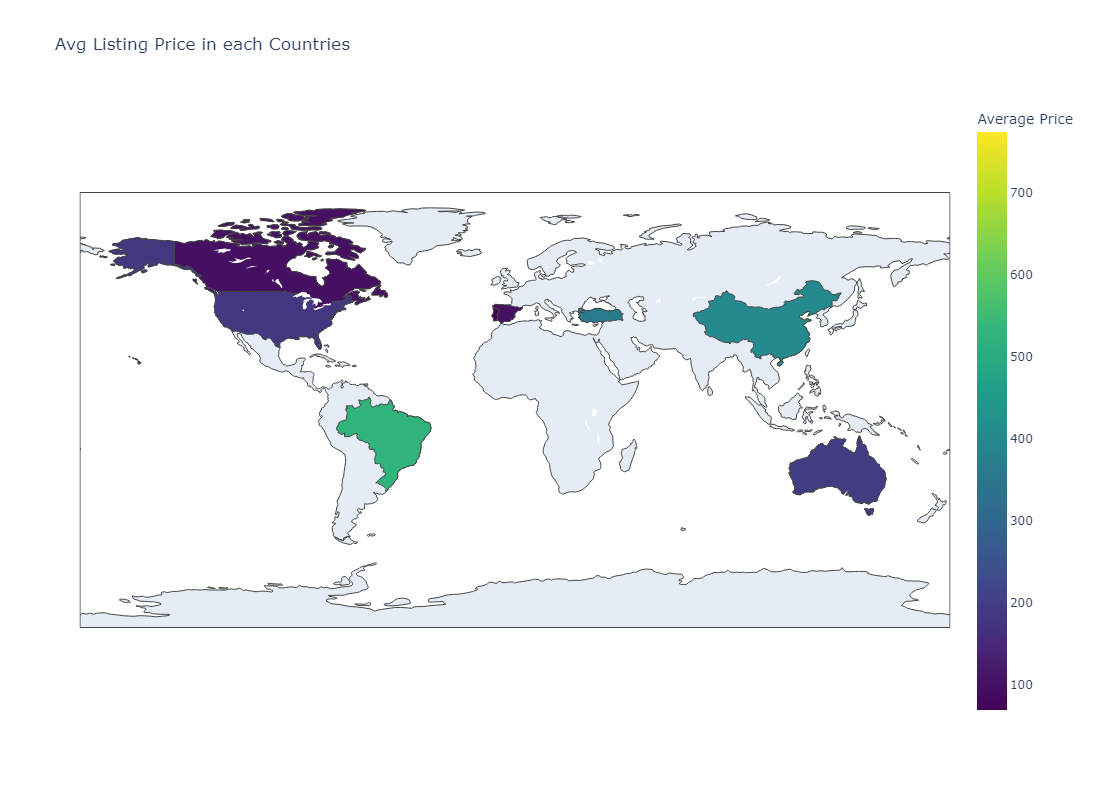

In [18]:
#Avg Listing Price in each Countries
import plotly.express as px

# Group by 'Country' and calculate the mean price
df1 = df.groupby('Country')['Price'].mean().reset_index()

# Create choropleth map
fig = px.choropleth(df1, locations='Country', locationmode='country names', color='Price',
                    color_continuous_scale='Viridis', range_color=(df1['Price'].min(), df1['Price'].max()),
                    labels={'Price': 'Average Price'}, title='Avg Listing Price in each Countries')
fig.update_layout(height=800, width=1000)
fig.show()


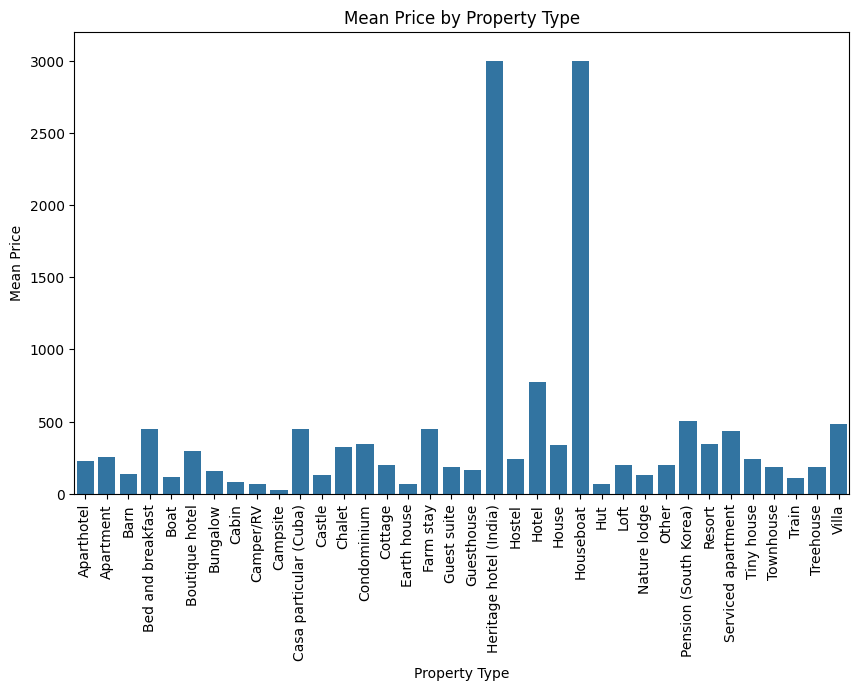

In [19]:
#Mean Price by Property Type
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping data to calculate mean price for each property type
df2 = df.groupby('Property_type')['Price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df2, x='Property_type', y='Price')
plt.xticks(rotation=90)
plt.ylim(0, 3200)  # Set y-axis limit
plt.xlabel('Property Type')
plt.ylabel('Mean Price')
plt.title('Mean Price by Property Type')
plt.show()


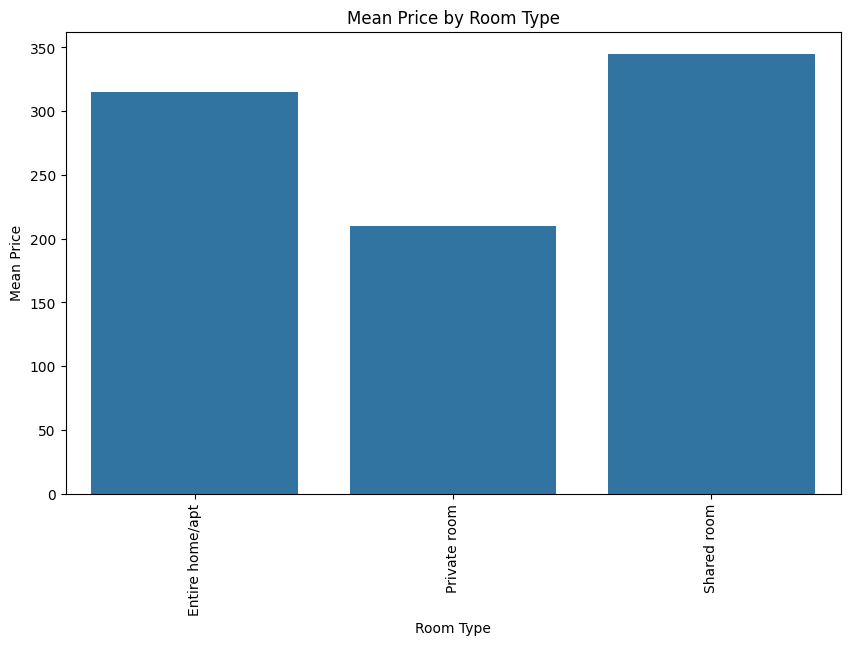

In [20]:
#Mean price by Room_type
import seaborn as sns
import matplotlib.pyplot as plt
df2 = df.groupby('Room_type')['Price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=df2,x='Room_type',y='Price')
plt.xticks(rotation=90)
plt.xlabel('Room Type')
plt.ylabel('Mean Price')
plt.title('Mean Price by Room Type')
plt.show()


In [21]:
# How pricing is dependent on different Varibale (Linear Regression)
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
df_reg = pd.get_dummies(df, columns=['Room_type','Bed_type','Property_type'], dtype='int')
X=df_reg.drop(['ID','Property_Name','Minimum_nights','Maximum_night','Cancellation_policy','Price','Street',
               'Host_id','Host_name','Suburb','Market','Country'],axis=1)
Y=df_reg['Price']
model = LinearRegression()
model.fit(X,Y)
df['prediction']=model.predict(X)
print(f"MSE:{mean_squared_error(Y,df['prediction'])}")
print(f"MSE:{r2_score(Y,df['prediction'])}")


MSE:664540.064871767
MSE:0.06431267163922794


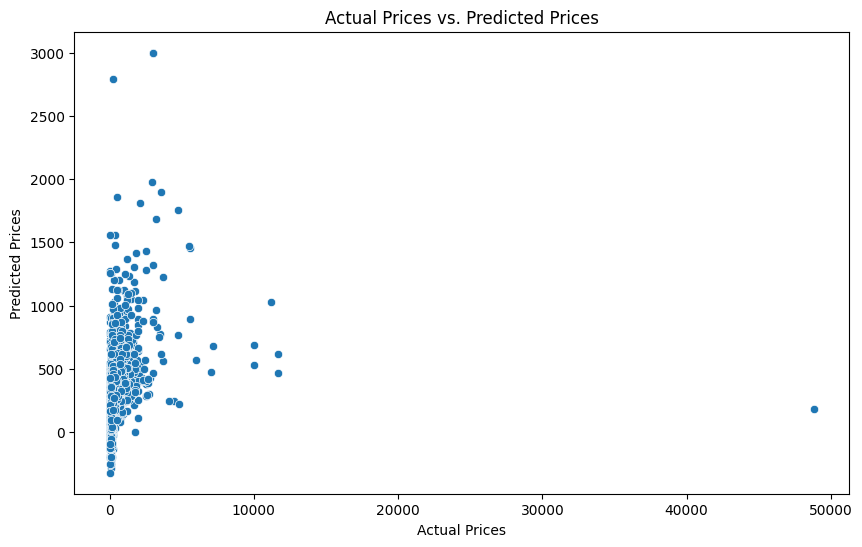

In [22]:
# Plot actual prices vs. predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y, y=df['prediction'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

In [23]:
# Feature coefficients (To find the model is which has highest dependence)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

                                 Feature  Coefficient
44  Property_type_Heritage hotel (India)  2563.228683
48               Property_type_Houseboat  2259.289835
46                   Property_type_Hotel   369.406078
6                         No_of_Bathroom   165.730837
0                           Accommodates    39.734333
..                                   ...          ...
39                 Property_type_Cottage  -254.921449
40             Property_type_Earth house  -277.800235
27                    Property_type_Barn  -283.358894
57               Property_type_Townhouse  -293.847407
58                   Property_type_Train  -355.582214

[61 rows x 2 columns]


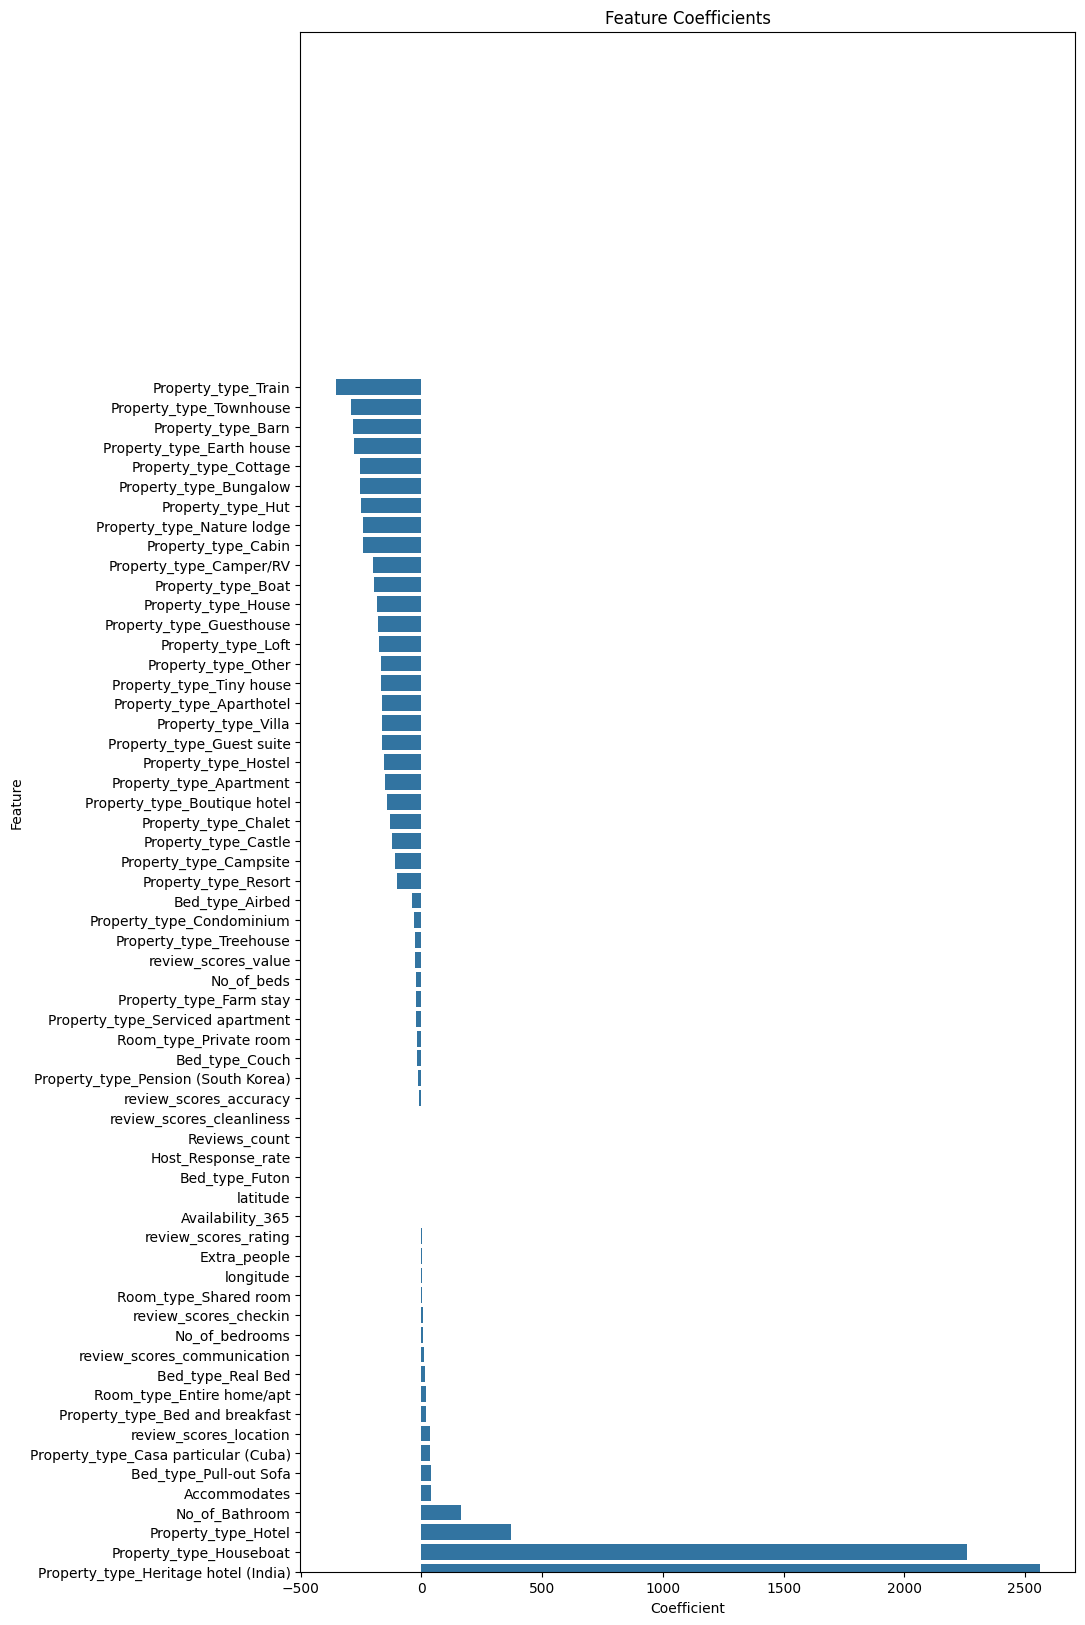

In [24]:
# Plotting the feature coefficients
plt.figure(figsize=(10, 20))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.ylim(0,78)
plt.title('Feature Coefficients')
plt.show()

C:\Users\ronit\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 33391 (\N{CJK UNIFIED IDEOGRAPH-826F}) missing from current font.

C:\Users\ronit\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 24503 (\N{CJK UNIFIED IDEOGRAPH-5FB7}) missing from current font.

C:\Users\ronit\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 34903 (\N{CJK UNIFIED IDEOGRAPH-8857}) missing from current font.

C:\Users\ronit\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from current font.

C:\Users\ronit\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from current font.

C:\Users\ronit\AppData\Local\Programs\Py

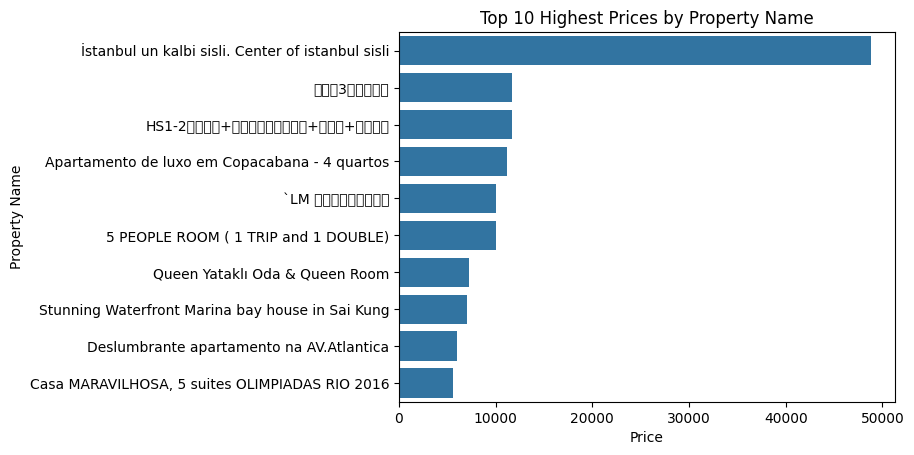

In [25]:
#Top 10 Highest Prices by Property Name
import seaborn as sns
import matplotlib.pyplot as plt
# Specify a different font that is available on your system
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = ['Arial']
#plt.rcParams['font.family'] = ['Arial Unicode MS']
#plt.rcParams['font.family'] = ['Arial Unicode MS']
# Selecting the top 10 highest prices along with the property types
top_10_highest_prices = df.sort_values(by='Price', ascending=False).head(10)[['Property_Name', 'Price']]

# Creating a bar plot
sns.barplot(data=top_10_highest_prices, x='Price', y='Property_Name')
plt.xlabel('Price')
plt.ylabel('Property Name')
plt.title('Top 10 Highest Prices by Property Name')
plt.show()


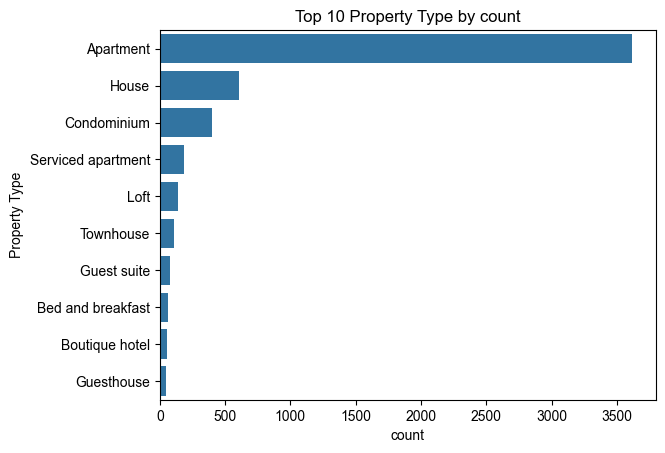

In [26]:
#Top 10 Property Type by count
import seaborn as sns
import matplotlib.pyplot as plt
# Specify a different font that is available on your system
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
# Group by 'Property_type' and count occurrences
top_10_Property_type = df.groupby(['Property_type']).size().sort_values(ascending=False).head(10)

# Convert the Pandas Series to a DataFrame
top_10_Property_type_df = top_10_Property_type.reset_index(name='count')

# Plot the barplot
sns.barplot(data=top_10_Property_type_df, x='count', y='Property_type')
plt.xlabel('count')
plt.ylabel('Property Type')
plt.title("Top 10 Property Type by count")
plt.show()


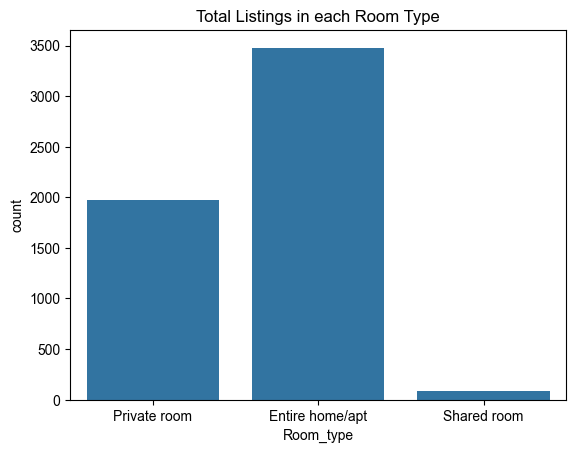

In [27]:
# Total Listing in each Room Type
sns.countplot(data=df,x=df.Room_type)
plt.title("Total Listings in each Room Type")
plt.show()

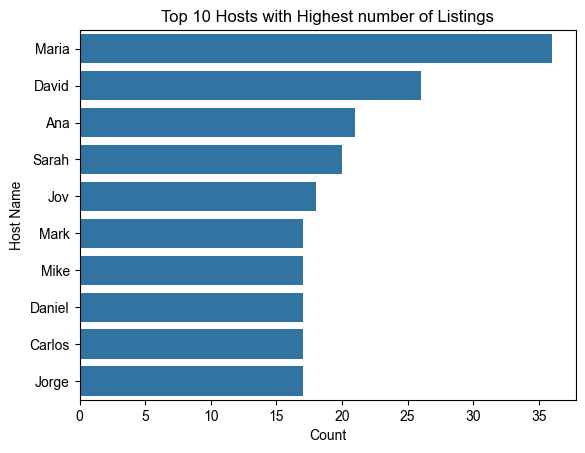

In [28]:
#Top 10 Hosts with Highest number of Listings
query = df.groupby('Host_name').size().sort_values(ascending=False).head(10)
query_count= query.reset_index(name='Count')
sns.barplot(data= query_count,y='Host_name',x='Count')
plt.ylabel('Host Name')
plt.title('Top 10 Hosts with Highest number of Listings')
plt.show()